In [2]:
import matplotlib.pyplot as plt
from os.path import isfile, join, abspath, dirname
from os import listdir
import sys

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
sys.path.insert(0, '../src/')

In [5]:
from logger import LogData, TemporalLogger, EnvLogger
from utils import plot_typography

In [23]:
plot_typography(True, 12, 14, 16)

In [33]:
__file__ = "analysis.ipynb"
log_dir = join(dirname(dirname(abspath(__file__))), "log")
envs =  ["PongNoFrameskip-v0", "PongNoFrameskip-v4",
         "BreakoutNoFrameskip-v0", "BreakoutNoFrameskip-v4",
         "SeaquestNoFrameskip-v0", "SeaquestNoFrameskip-v4"]
cols = ['attention_target', 'attention_type', 'env_name', 
        'timestamp', 'mean_reward',
       'mean_feat_std', 'mean_proxy']
decimate = 100


def figure_factory(log_dir, env, variant, rew_scale=5, feat_scale=1, decimate=100, save=True, loc_feat=1, loc_rwd=4, zoom_feat=2.5, zoom_rwd=2.5):
    # sanity check
    if variant not in [0,4]:
        raise ValueError(f"Invalid variant, got {variant}, should be 0 or 4")
    
    # load data 
    el = EnvLogger(f"{env}NoFrameskip-v{variant}", log_dir, decimate)

    # plot
    el.plot_decorator(keyword="rewards", save=save, y_inset_std_scale=rew_scale, loc=loc_rwd, zoom=zoom_rwd)
    el.plot_decorator(keyword="features", save=save, y_inset_std_scale=feat_scale, loc=loc_feat, zoom=zoom_feat)


---------------------------------------------------
Baseline, rewards, 41.85032183709318
ICM, single attention, rewards, 42.082247499945844
ICM, double attention, rewards, 42.38773814116183
AttA2C, rewards, 45.01620548296677
RCM, rewards, 44.74406329261071
---------------------------------------------------
Baseline, features, 0.3617594126340933
ICM, single attention, features, 0.41307967656877664
ICM, double attention, features, 0.423795945189495
AttA2C, features, 0.5798990521881701
RCM, features, 0.3547232907031271


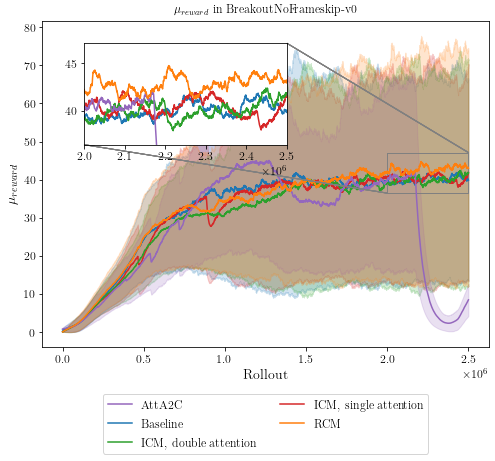

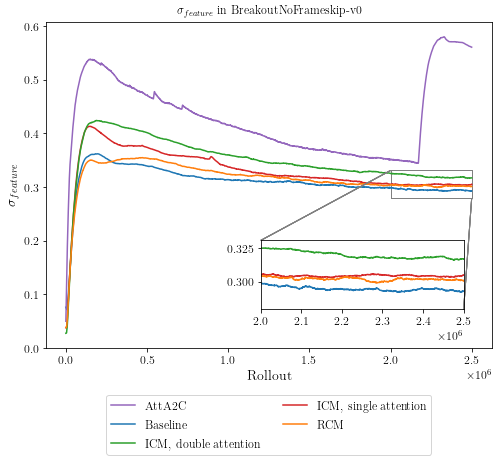

In [34]:
figure_factory(log_dir, "Breakout", 0, .4, .25, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=2.5, zoom_feat=2.5)

---------------------------------------------------
ICM, double attention, rewards, 1786.3463161080642
AttA2C, rewards, 1380.2413853533258
Baseline, rewards, 1485.1571065302956
ICM, single attention, rewards, 1489.2479689578004
RCM, rewards, 1968.3400258213956
---------------------------------------------------
ICM, double attention, features, 0.2692376415005916
AttA2C, features, 0.6859720893980429
Baseline, features, 0.264597451018303
ICM, single attention, features, 0.28509624110648296
RCM, features, 0.28100993285649695


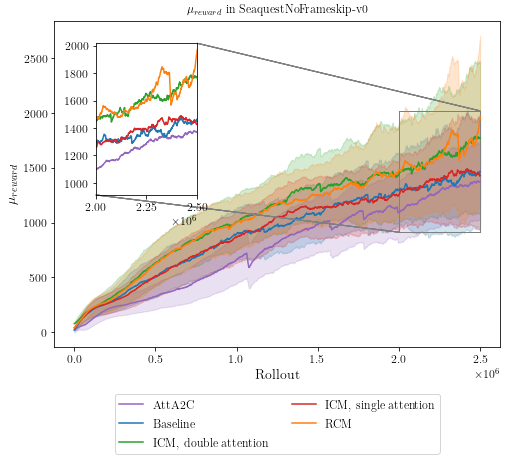

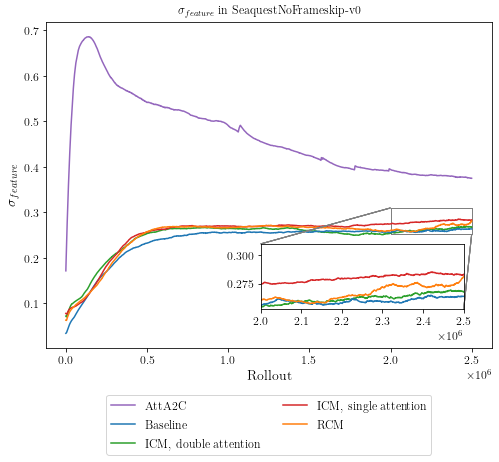

In [35]:
figure_factory(log_dir, "Seaquest", 0, 2.4, .7, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=1.25, zoom_feat=2.5) 

---------------------------------------------------
Baseline, rewards, 14.10082626561367
ICM, single attention, rewards, 14.894776390859246
ICM, double attention, rewards, 14.007907418817837
AttA2C, rewards, 14.018834198614167
RCM, rewards, 14.701438013286754
---------------------------------------------------
Baseline, features, 0.263527996042246
ICM, single attention, features, 0.2881306463575053
ICM, double attention, features, 0.2863231411975223
AttA2C, features, 0.9185313410155928
RCM, features, 0.26566310767539


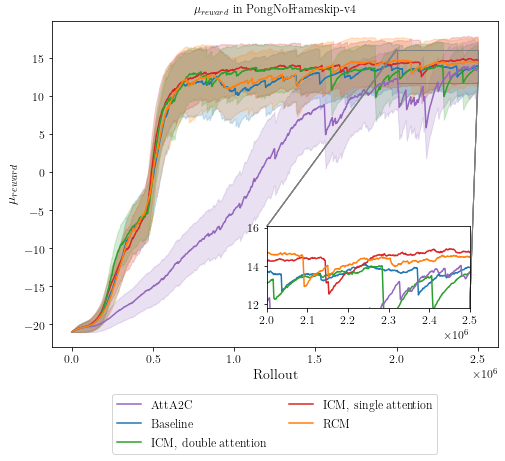

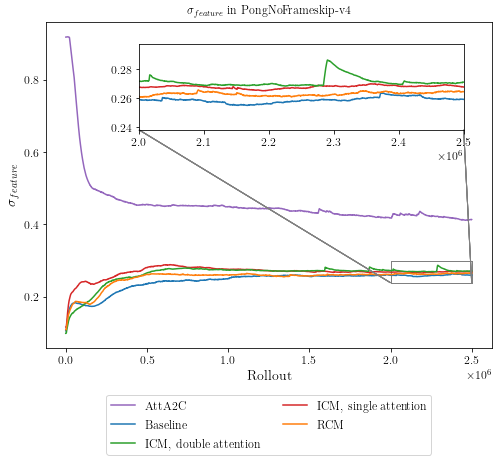

In [36]:
figure_factory(log_dir, "Pong", 4, 5, .5, 100, save=False, loc_rwd=4, loc_feat=1, zoom_rwd=2.5, zoom_feat=4) 

---------------------------------------------------
RCM, rewards, 44.88180924526146
Baseline, rewards, 44.74723977751706
ICM, single attention, rewards, 45.586232310351214
ICM, double attention, rewards, 43.44161328920448
AttA2C, rewards, 47.082735253291155
---------------------------------------------------
RCM, features, 0.4026167847195444
Baseline, features, 0.3913455893033198
ICM, single attention, features, 0.41431579979651656
ICM, double attention, features, 0.4057384335868263
AttA2C, features, 0.5314870985380681


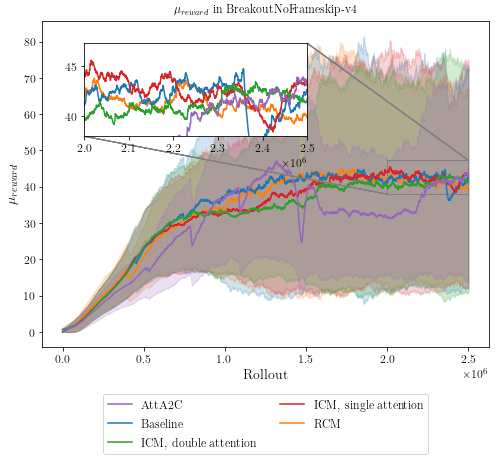

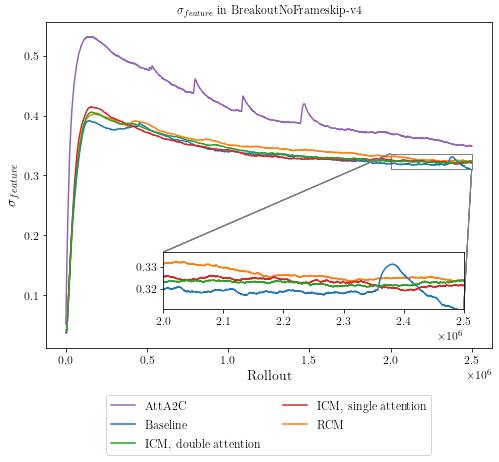

In [37]:
figure_factory(log_dir, "Breakout", 4, 3.5, 1, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=2.75, zoom_feat=3.7) 

---------------------------------------------------
Baseline, rewards, 1805.8424059604015
ICM, single attention, rewards, 1887.50762232385
ICM, double attention, rewards, 2010.3624310528612
AttA2C, rewards, 1491.6428031451583
RCM, rewards, 1941.0086872051622
---------------------------------------------------
Baseline, features, 0.2684388298716237
ICM, single attention, features, 0.26245144690105476
ICM, double attention, features, 0.2866472907516775
AttA2C, features, 0.6035075087156622
RCM, features, 0.26941368681001937


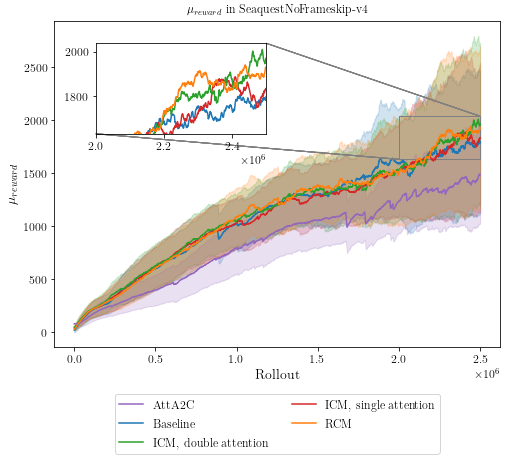

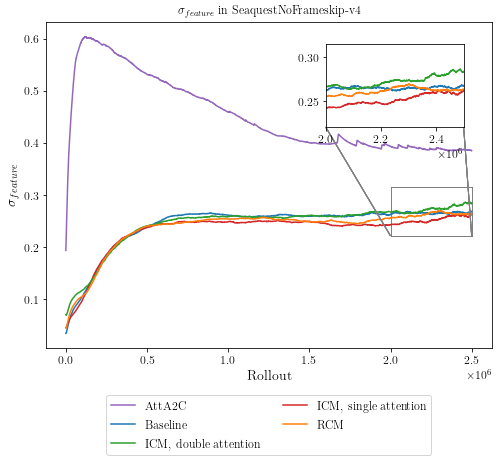

In [38]:
figure_factory(log_dir, "Seaquest", 4, 1.2, 1., 100, save=False, loc_rwd=2, loc_feat=1, zoom_rwd=2.1, zoom_feat=1.7) 

In [ ]:
el = EnvLogger("PongNoFrameskip-v4", log_dir, decimate)

In [ ]:
el.params_df[cols].sort_values(by=["mean_reward", "mean_proxy"], ascending=False)#.loc[el.params_df.timestamp == '2019-07-20 10_21_45']

In [ ]:
el.plot_mean_std(*["rewards"])

In [ ]:
el.plot_mean_std(*["features"])

In [ ]:
el.plot_proxy()

In [ ]:
el.plot_rewards()

In [ ]:
el.plot_feat_std()

---------------------------------------------------
Baseline, rewards, 14.242315186344161
ICM, single attention, rewards, 14.8144401188527
ICM, double attention, rewards, 14.309682647049204
AttA2C, rewards, 13.986562602490473
RCM, rewards, 14.807253449390586
---------------------------------------------------
Baseline, features, 0.25621727993543214
ICM, single attention, features, 0.25615468617522263
ICM, double attention, features, 0.2717061127869625
AttA2C, features, 0.9260319231007617
RCM, features, 0.27429376763820973


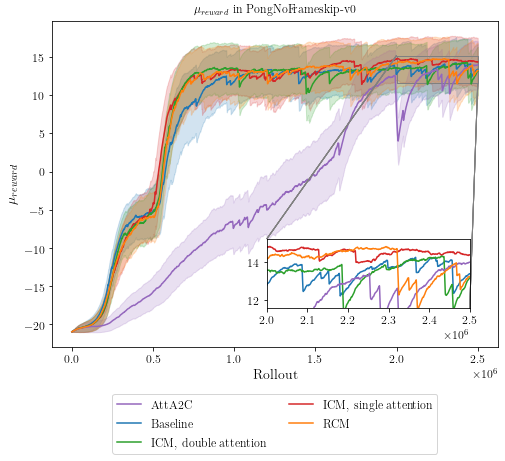

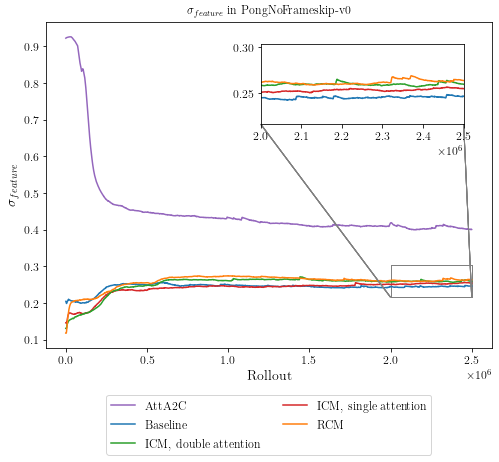

In [32]:
# seeds set

#figure_factory(log_dir, "Pong", 0, 3.85, .75, 100, save=True, loc_rwd=4, loc_feat=1)

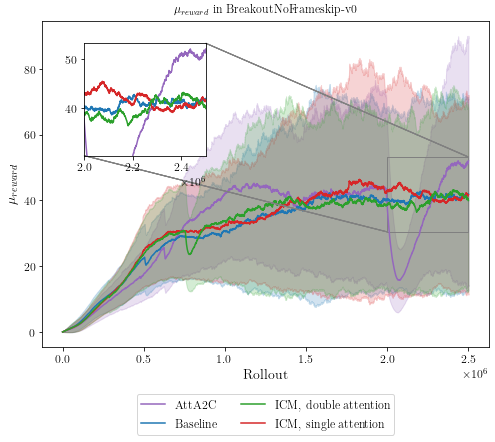

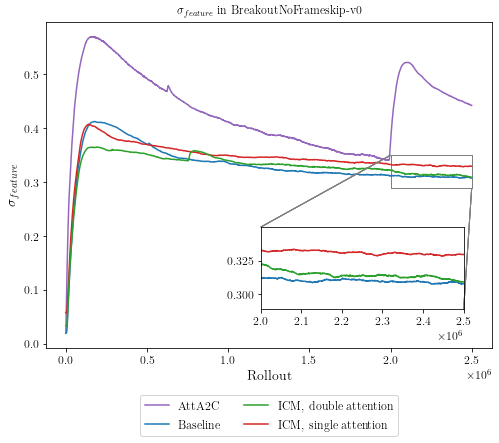

In [25]:
#not saved
figure_factory(log_dir, "Breakout", 0, 2.4, .55, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=1.5, zoom_feat=2.5)

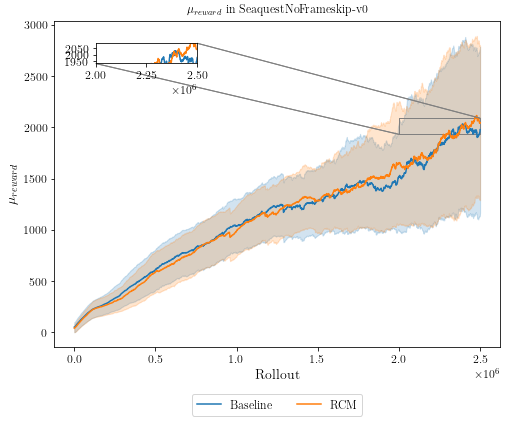

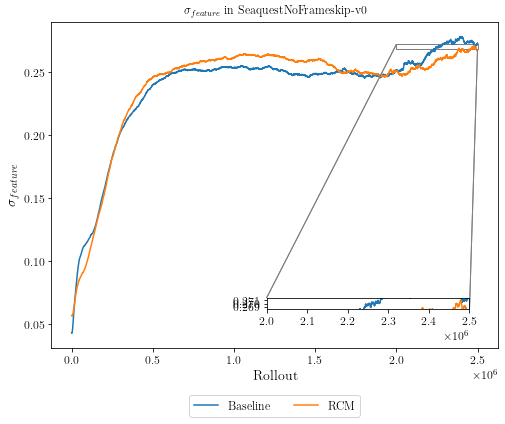

In [14]:
#not saved
figure_factory(log_dir, "Seaquest", 0, 2.4, .7, 100, save=False, loc_rwd=2, loc_feat=4, zoom_rwd=1.25, zoom_feat=2.5) 